<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/MachineLearningTechnique_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import functools

In [ ]:
def get_combinations(x,degree):
  return itertools.combinations_with_replacement(x, degree)

In [ ]:
def compute_new_feature(items):
  return functools.reduce(lambda x , y: x*y , items)

In [ ]:
for i in get_combinations([2] , 3):
  print(i)


(2, 2, 2)


In [ ]:
for i in get_combinations([2,3] , 3):
  print(i)


(2, 2, 2)
(2, 2, 3)
(2, 3, 3)
(3, 3, 3)


In [ ]:
for i in get_combinations([2,3] , 3):
  print(i , ":",  compute_new_feature(i))



(2, 2, 2) : 8
(2, 2, 3) : 12
(2, 3, 3) : 18
(3, 3, 3) : 27


In [ ]:
for i in get_combinations([1,4] , 4):
  print( i , ":",  compute_new_feature(i))


(1, 1, 1, 1) : 1
(1, 1, 1, 4) : 4
(1, 1, 4, 4) : 16
(1, 4, 4, 4) : 64
(4, 4, 4, 4) : 256


In [ ]:
for i in get_combinations([2] , 4):
  print(i , ":",  compute_new_feature(i))

(2, 2, 2, 2) : 16


In [ ]:
import numpy as np


In [ ]:
def polynomial_transform(x, degree, logging = False):
  if x.ndim == 1:
    x = x[: , None]

  xt = x.transpose()
  features = [np.ones(len(x))]

  if logging:
    print("Input:" , x)
  for degree in range(1 , degree+1):
    for items in get_combinations(xt , degree):
      features.append(compute_new_feature(items))
      if logging:
        print(items , ":" , compute_new_feature(items))

  if logging:
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()        






In [ ]:
polynomial_transform(np.array([2]), 3, logging = True)

Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
polynomial_transform(np.array([2,3]), 3, logging = True)

Input: [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
(array([2, 3]), array([2, 3]), array([2, 3])) : [ 8 27]
[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [ ]:
polynomial_transform(np.array([[1,2] , [7,9]]), 2, logging = True)

Input: [[1 2]
 [7 9]]
(array([1, 7]),) : [1 7]
(array([2, 9]),) : [2 9]
(array([1, 7]), array([1, 7])) : [ 1 49]
(array([1, 7]), array([2, 9])) : [ 2 63]
(array([2, 9]), array([2, 9])) : [ 4 81]
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  7.  9. 49. 63. 81.]]


array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  7.,  9., 49., 63., 81.]])

In [ ]:
x = np.array([1,2,3])
x.ndim


1

In [ ]:
x.transpose()

array([1, 2, 3])

In [ ]:
if x.ndim == 1:
  x = x[: , None]

In [ ]:
x

array([[1],
       [2],
       [3]])

In [ ]:
x.ndim

2

In [ ]:
x.transpose()

array([[1, 2, 3]])

In [ ]:
y= np.array([[1,2,3] , [1,2,3]])

In [ ]:
y = y[:, ]

In [ ]:
y

array([[1, 2, 3],
       [1, 2, 3]])

In [ ]:
y.transpose()

array([[1, 1],
       [2, 2],
       [3, 3]])

In [ ]:
polynomial_transform(np.array([5]), 3, logging = True)

Input: [[5]]
(array([5]),) : [5]
(array([5]), array([5])) : [25]
(array([5]), array([5]), array([5])) : [125]
[[  1.   5.  25. 125.]]


array([[  1.,   5.,  25., 125.]])

In [ ]:
polynomial_transform(np.array([[5, 6] , [2,3]]), 2, logging = True)

Input: [[5 6]
 [2 3]]
(array([5, 2]),) : [5 2]
(array([6, 3]),) : [6 3]
(array([5, 2]), array([5, 2])) : [25  4]
(array([5, 2]), array([6, 3])) : [30  6]
(array([6, 3]), array([6, 3])) : [36  9]
[[ 1.  5.  6. 25. 30. 36.]
 [ 1.  2.  3.  4.  6.  9.]]


array([[ 1.,  5.,  6., 25., 30., 36.],
       [ 1.,  2.,  3.,  4.,  6.,  9.]])

In [ ]:
polynomial_transform(np.array ([5, 4]), 2, logging = False)

array([[ 1.,  5., 25.],
       [ 1.,  4., 16.]])

# POLYNOMIAL REGRESSION

In [ ]:
def create_nonlin_training_set(func, sample_size, std):
  x =np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale=std , size =x.shape)
  return x, y


In [ ]:
def nonlin(a):
  return np.sin(2 * np.pi * a)

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
def visualize_training_data(x_train , y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)

  plt.scatter(x_train , y_train, facecolor = "green" , edgecolor = "black" ,
              s = 50 , label = "training data")
  plt.plot(points , output , c = "g" , label = "2sin pi x")
  plt.xlabel("$x_1$")
  plt.ylabel("y")
  plt.legend()
  plt.show()

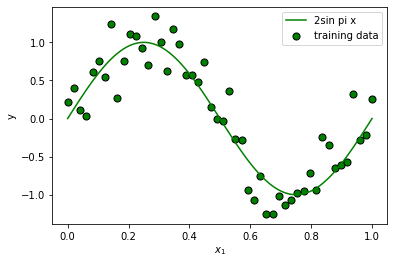

In [ ]:
num_samples = 50
x, y = create_nonlin_training_set(nonlin, num_samples , 0.3)
visualize_training_data(x ,  y)

In [ ]:
def visualize_model_fit(x , y , lin_reg , degree):
  points = np.linspace(0,1,100)
  output = nonlin(points)

  if degree>0:
    plt.scatter(x , y, facecolor = "black" , edgecolor = "black" ,
              s = 50 , label = "training data") # x and y is same as points and output just with addition of noise in y values
  plt.plot(points , output , c = "g" , label = "2sin pi x") # (2 sin pi x) output

# we are trying to plot the the above curve to compare it with the curve from below code.
 
  yhat = lin_reg.predict(polynomial_transform(points , degree))  # polynomial transformed output
  plt.plot(points , yhat , c = "r" , label = "2sin pi x")
  plt.xlabel("x_1")
  plt.ylim(-1.5 , 1.5)
  plt.title("M = {}" .format(degree)) 


 


In [ ]:
from sklearn.linear_model import LinearRegression

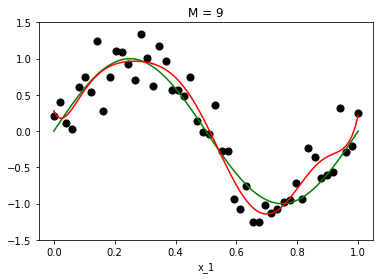

In [ ]:
degree = 9
x_transform = polynomial_transform(x, degree)
lin_reg = LinearRegression()
lin_reg.fit(x_transform, y)
visualize_model_fit(x,y,lin_reg,degree)

In [ ]:
import seaborn as sns

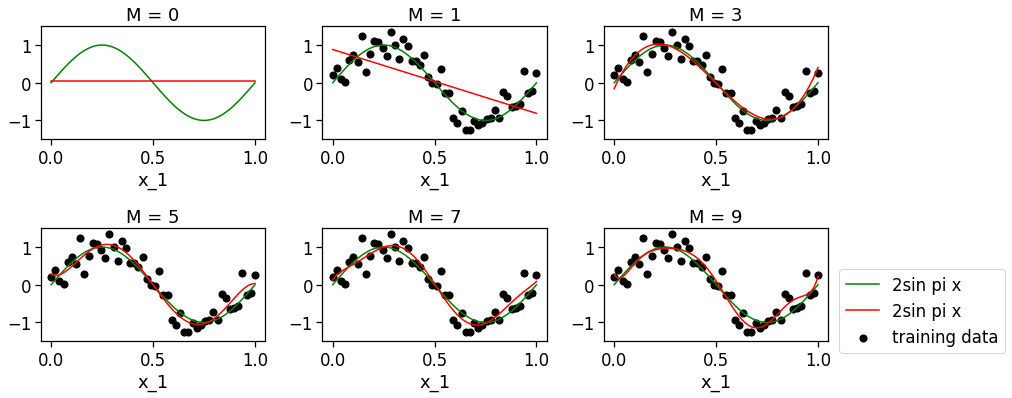

In [ ]:
f = plt.figure(figsize = (12,8))
sns.set_context("notebook" , font_scale = 1.5 , rc = {"lines.linewid":2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3 , 3 , i+1)
  x_transform = polynomial_transform(x,degree)
  lin_reg = LinearRegression()
  lin_reg.fit(x_transform , y)
  visualize_model_fit(x ,y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor = (1.05 , 0.64) , loc = 2 , borderaxespad =0.)
plt.show() 

In [ ]:
import pandas as pd

In [ ]:
from IPython.display import display, Math, Latex
%matplotlib inline

In [ ]:
import numpy as np

In [ ]:
 x = np.array([[1,2,3] , [3,2,4]])

In [ ]:
y = np.array([2,4])

In [ ]:
w = np.array([1 , 0.1 , -0.2 , 0.3])

In [ ]:
rr = 0.1

In [ ]:
1%2

1

In [ ]:
#@title[Import libraries]
from IPython.display import display,Math,Latex
import numpy as np
#Import for generating plots
import matplotlib.pyplot as plt
import seaborn as ans
#matplotlib inline.

In [ ]:
for i in range(1,21):
  l = []
  if i%2 == 0:
    print("1")
  else:
    print("0")
    

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [ ]:
l

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [ ]:
l = np.array(l)

In [ ]:
if x.ndim == 1:
    x = x[: , None]

AttributeError: ignored

In [ ]:
l.ndim

1

In [ ]:
l = l[: , None]

In [ ]:
l

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [ ]:
l = l[: , None]

In [ ]:
import numpy as np
import random
def additional_vector(X):
    l = []
    for i in range(1,21):
        if i%2 == 0:
            i=1
            l.append(i)
        else:
            i=0
            l.append(i)

    l = np.array(l)
    
    print(np.stack(X, l ))

In [ ]:
def additional_vector(X):
    l = []
    for i in range(1,21):
        if i%2 == 0:
            i=1
            l.append(i)
        else:
            i=0
            l.append(i)

    l = np.array(l)
    print(np.column_stack((X , l)))

In [ ]:
x = np.linspace(1,1,60)

In [ ]:
x = x.reshape(20,3)

In [ ]:
additional_vector(x)

[[1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]


In [ ]:
import numpy as np
import random
import itertools
import functools

def get_combinations(x,degree):
  return itertools.combinations_with_replacement(x, degree)
        
def compute_new_feature(items):
  return functools.reduce(lambda x , y: x*y , items)        
        
def polynomial_transform(x, degree, logging = False):

    if x.ndim == 1:
        x = x[: , None]
    
    xt = x.transpose()
    features = [np.ones(len(x))]

    if logging:
        print("Input:" , x)
    for degree in range(1 , degree+1):
        for items in get_combinations(xt , degree):
            features.append(compute_new_feature(items))
            if logging:
                print(items , ":" , compute_new_feature(items))

    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose() 


def model_error(X, y,degree):
    X = polynomial_transform(X,degree)
    w = np.linalg.inv(X.transpose()@X)@X.transpose()@y
    loss = (1/2)*(X@w - y).transpose()@(X@w-y)
    RMSE = np.sqrt((2/len(y))*loss)
    return RMSE